## Week7 LinearRegression

In week 7, we've covered:
* Basic machine learning concepts and workflow
* Linear regression
  
  
In this notebook,  we will work on the Boston housing dataset and build a linear regression model to predict value of houses.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). The Boston housing data was collected in 1978 and each of the 506 entries represents aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.  
  
  
A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.  
  
  
Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a **TODO** statement and "____"
.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

Upload **Week7_LinearRegression_Homework.ipynb** and **housing.csv** to Google Drive.

----
## 1. Import Libraries
Import pandas, numpy, matplotlib and seaborn. Then set %matplotlib inline.

In [10]:
# TODO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

---
## 2. Load Data
Read in the housing.csv file as a DataFrame called `data`.

In [2]:
# Upload housing.csv to your google Drive then read the data using pandas.

csv = "https://drive.google.com/file/d/1diUW5XOYCZ7WkhNphzRl_yyIkNAxVBVM/view"
file_name = csv.split('/')[-2]
file_name

data = pd.read_csv(f"https://drive.google.com/uc?id={file_name}")
print(data.shape)

# Success
print("Boston housing dataset has {} data points with {} columns.".format(*data.shape))

(489, 4)
Boston housing dataset has 489 data points with 4 columns.


---
## 3. Explore Data

Familiarizing ourself with the data through an explorative process is a fundamental practice to help us better understand and justify our results.

In [3]:
# TODO: Get the first n rows of data
data.head(5)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [4]:
# TODO: Get a summary of the dataframe
print(data.shape)
print(data.dtypes)

(489, 4)
RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object


In [44]:
# TODO: Calculate descriptive statistics
print(data.describe(include='all'))
#confirming no nulls
data.isnull().sum()

               RM       LSTAT     PTRATIO          MEDV
count  489.000000  489.000000  489.000000  4.890000e+02
mean     6.240288   12.939632   18.516564  4.543429e+05
std      0.643650    7.081990    2.111268  1.653403e+05
min      3.561000    1.980000   12.600000  1.050000e+05
25%      5.880000    7.370000   17.400000  3.507000e+05
50%      6.185000   11.690000   19.100000  4.389000e+05
75%      6.575000   17.120000   20.200000  5.187000e+05
max      8.398000   37.970000   22.000000  1.024800e+06


RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**.  
  

The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point.   
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.   
  
The **target variable**, `'MEDV'`, will be the variable we seek to predict.  

In [6]:
features = data.drop('MEDV', axis=1)
target = data['MEDV']


Calculate Statistics
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`.
- Store each calculation in their respective variable.
- Use `numpy` to perform the necessary calcualtions.

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429474


<ipython-input-46-547266795df7>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target)


<Axes: xlabel='MEDV', ylabel='Density'>

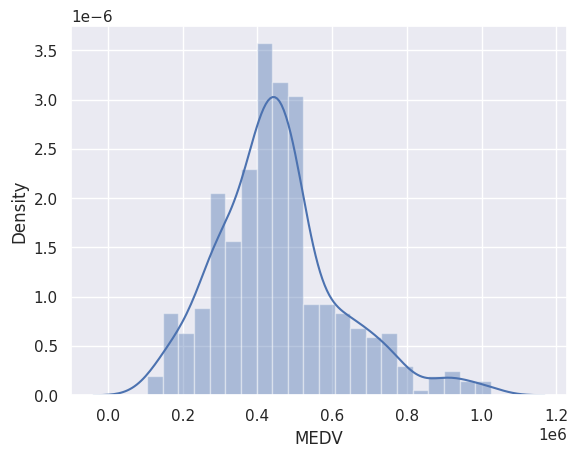

In [46]:
# TODO: Minimum price of the data
minimum_price = np.min(target)

# TODO: Maximum price of the data
maximum_price = np.max(target)

# TODO: Mean price of the data
mean_price = np.mean(target)

# TODO: Median price of the data
median_price = np.median(target)

# TODO: Standard deviation of prices of the data
std_price = np.std(target)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price))
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

sns.distplot(target)

Observe features

For each of the three features **RM**, **LSTAT**, **PTRATIO**:
  * Do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`?
  * Show the data using appropriate plot and justify your answer for each.

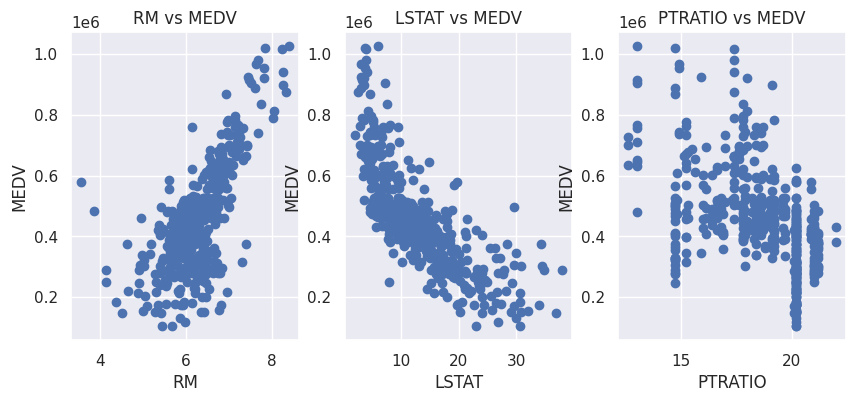

In [14]:
# TODO
data.head(5)

plt.figure(figsize=(10, 4))
plt.subplot(131)
plt.scatter(data["RM"], data["MEDV"])
plt.title('RM vs MEDV')
plt.xlabel('RM' )
plt.ylabel('MEDV')

plt.subplot(132)
plt.scatter(data["LSTAT"], data["MEDV"])
plt.title('LSTAT vs MEDV')
plt.xlabel('LSTAT' )
plt.ylabel('MEDV')

plt.subplot(133)
plt.scatter(data["PTRATIO"], data["MEDV"])
plt.title('PTRATIO vs MEDV')
plt.xlabel('PTRATIO' )
plt.ylabel('MEDV')

plt.show()


#RM -> Increase in rooms shows a positive correlation to an increase in price
#LSTAT -> Increase in lower class shows a negative correlation to an increase in price
#PTRATIO -> the ratio of students to teachers in primary and secondary schools in the neighborhood seems to have some correlation, but not as strong as RM or LSTAT

**Answer**:    TODO  


----

## 4. Develop Model

Split data to get training and testing Data.

In [65]:
# TODO
# Split train and test (test_size=0.2, random_state=42)
# Feature scaling
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Print the shapes of the split sets
print("Training data shape:", features_train.shape)
print("Testing data shape:", features_test.shape)


#scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(features_train)
features_train_scaled = scaler.transform(features_train)
features_test_scaled = scaler.transform(features_test)

print("Training data shape fitted:", features_train_scaled.shape)
print("Testing data shape fitted:", features_test_scaled.shape)


Training data shape: (391, 3)
Testing data shape: (98, 3)
Training data shape fitted: (391, 3)
Testing data shape fitted: (98, 3)


Why should we perform feature scailing?

Data scaling is a way to limit numerical values within a specified range. This is a necessary pre-preprocessing step to some algorithms, expecially neural networks.

Data normalization is a way to change the distribution of numerical values. Models like LDA, Gaussian Naive Bayes, Logistic Regression, Linear Regression, etc., are explicitly calculated from the assumption that the distribution is a bivariate or multivariate normal.

**Answer**:    TODO


Create linear regression object

In [71]:
# TODO
from sklearn.linear_model import LinearRegression

reg = LinearRegression()


Train/fit **lm** on the training data.

In [72]:
# TODO
reg.fit(features_train_scaled, target_train)
print(reg.score(features_train_scaled, target_train))
print(reg.coef_)
print(reg.intercept_)


#practice, not needed for homework
from sklearn.feature_selection import f_regression
f_regression(features_train_scaled, target_train)
p_values = f_regression(features_train_scaled, target_train)[1]
p_values.round(3)



0.7194530968926247
[ 422377.49890323 -382236.7369749  -181649.45678709]
454465.58963392104


array([0., 0., 0.])

Display a dataframe with the features and their corresponding coefficients in descending order. Think about how would you interprete the results here.

In [68]:
# TODO
reg_summary = pd.DataFrame([["Bias"],["RM"],["LSTAT"],["PTRATIO"]], columns =["Features"])
reg_summary["Weights"]= reg.intercept_,reg.coef_[0], reg.coef_[1], reg.coef_[2]
reg_summary.sort_values(by=['Weights'], ascending=False)

,Features,Weights
0,Bias,454465.589634
1,RM,422377.498903
3,PTRATIO,-181649.456787
2,LSTAT,-382236.736975


## 5. Make Prediction

Now we have a trained model, let's make some predictions and evaluate the model's performance.

Use **lm.predict( )** to predict house prices for **X_test** data set.

In [69]:
# TODO
y_pred = reg.predict(features_test_scaled)

Create a scatterplot of **y_test** versus the predicted values.

Text(0, 0.5, 'target')

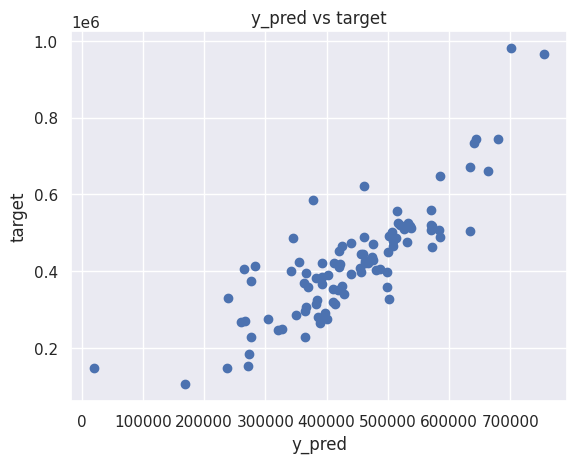

In [70]:
# TODO
plt.scatter(y_pred, target_test)
plt.title('y_pred vs target')
plt.xlabel('y_pred' )
plt.ylabel('target')

## 6. Evaluate Model

It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement.

Let's evaluate the model performance by calculating the Adjusted $R^2$.  

What's the benefit of using Adjusted $R^2$ versus $R^2$?

Adjusted R2 is best to use when there are multiple features included to understand the net add of including additional variables.

**Answer**:    TODO


Now calculate Adjusted $R^2$ for train set and test set. Hint: $R^2_{adj.}=1-(1-R^2)*\frac{n-1}{n-p-1}$

In [62]:
# TODO
#Train
r2_train = reg.score(features_train_scaled, target_train)
n_train =features_train_scaled.shape[0]
p_train = features_train_scaled.shape[1]
Adjusted_r2_train = 1-(1-r2_train)*(n_train-1)/(n_train-p_train-1)
print("Adjusted_r2_train", Adjusted_r2_train)


#Test
r2_test = reg.score(features_test_scaled, target_test)
n_test =features_test_scaled.shape[0]
p_test = features_test_scaled.shape[1]
Adjusted_r2_test = 1-(1-r2_test)*(n_test-1)/(n_test-p_test-1)
print("Adjusted_r2_test", Adjusted_r2_test)

Adjusted_r2_train 0.7172783146979939
Adjusted_r2_test 0.6812346790431443


## THE END, WELL DONE!

## Submission

Download completed **Week7_LinearRegression_Homework.ipynb** from Google Colab and commit to your personal Github repo you shared with the faculty.